# Isolation Forest on iris dataset

### Importation of the dataset from sklearn

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['kind'] = pd.Series(data.target)
df.head()

### For our example we will use only the sepal length and width features so that we can visualize the data

In [2]:
df = df[df.columns[:2]]
df.columns = ['length', 'width']
df

,length,width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


[]

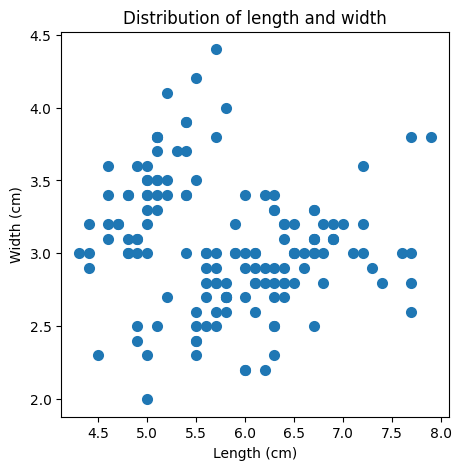

In [24]:
import matplotlib.pyplot as plt



plt.figure(figsize=(5,5))
plt.title('Distribution of length and width')
plt.scatter(df.length, df.width,linewidths=2)
plt.xlabel('Length (cm)')
plt.ylabel('Width (cm)')
plt.plot()

### We can see some outliers, we will use Isolation Forest to detect indentify them

<Figure size 640x480 with 0 Axes>

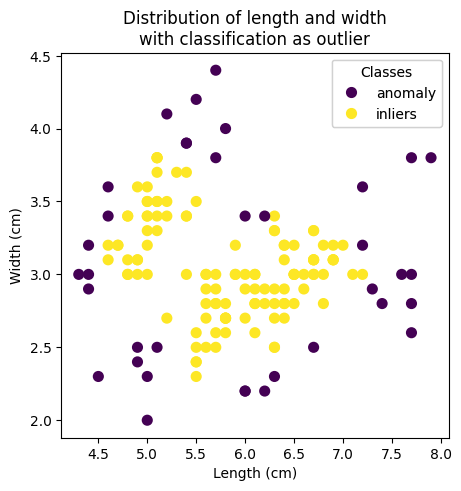

In [34]:
from sklearn.ensemble import IsolationForest

X = df.values

clf = IsolationForest(n_estimators=100)
clf.fit(X)

pred = clf.predict(X)

plt.figure()
fig, ax = plt.subplots(figsize=(5,5))

scatter = ax.scatter(df.length, df.width,c=pred, linewidths=2)
legend = ax.legend(scatter.legend_elements()[0],['anomaly', 'inliers'], title="Classes")
ax.add_artist(legend)
plt.title('Distribution of length and width\nwith classification as outlier')
plt.xlabel('Length (cm)')
plt.ylabel('Width (cm)')
plt.show()




### To add clarity we will plot a decision boundary

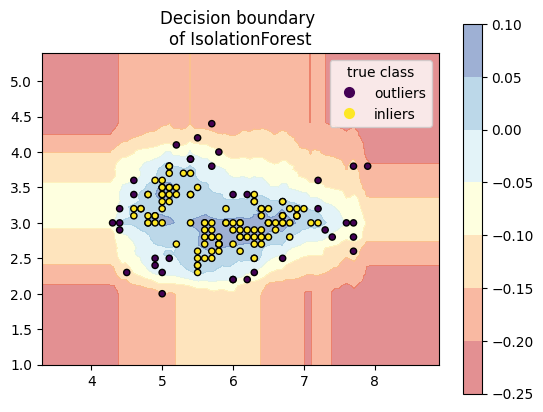

In [35]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    alpha=0.5,
    cmap=plt.cm.RdYlBu,
)

disp.ax_.scatter(X[:, 0], X[:, 1], c=pred, s=20, edgecolor="k")
disp.ax_.set_title("Decision boundary \nof IsolationForest")
plt.axis("square")
plt.ylim(top= 5.4)
plt.legend(handles= scatter.legend_elements()[0], labels=["outliers", "inliers"], title="true class")
plt.colorbar(disp.ax_.collections[0], cmap='RdYlBu')
plt.show()